In [1]:
import numpy as np
import matplotlib.pyplot as plt


Running EM algorithm for K = 2
Converged at iteration 24 for K = 2


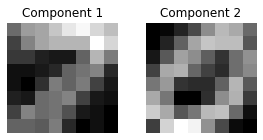


Running EM algorithm for K = 3
Converged at iteration 37 for K = 3


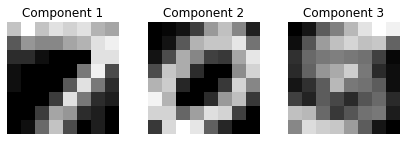


Running EM algorithm for K = 4
Converged at iteration 37 for K = 4


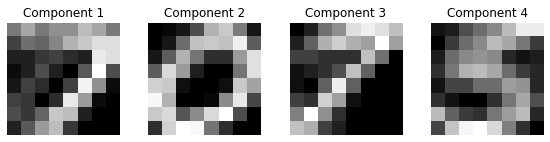


Running EM algorithm for K = 7
Converged at iteration 8 for K = 7


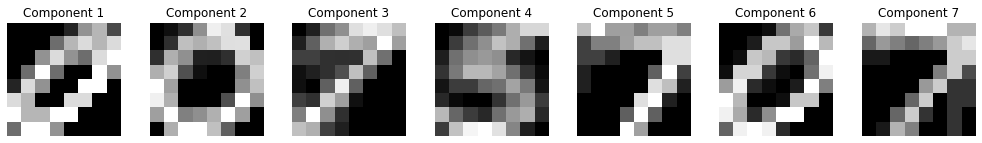


Running EM algorithm for K = 10
Converged at iteration 11 for K = 10


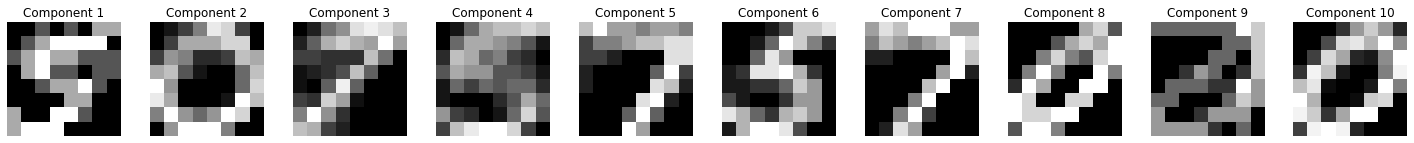

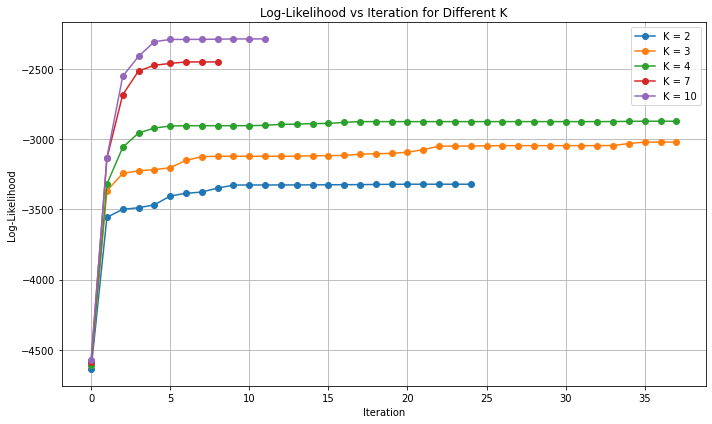

In [ ]:
def em_algorithm(X, K, max_iter=100, tol=1e-6):
    """
    Perform the Expectation-Maximization (EM) algorithm for a Bernoulli mixture model.

    Parameters:
        X (np.ndarray): The data matrix of shape (N, D), where N is the number of samples
                        and D is the dimensionality of each sample.
        K (int): The number of mixture components (clusters).
        max_iter (int): The maximum number of iterations to run the algorithm.
        tol (float): The tolerance for convergence based on log-likelihood improvement.

    Returns:
        pi_k (np.ndarray): Mixing coefficients of shape (K,), representing the prior probability
                           of each mixture component.
        P_kd (np.ndarray): Bernoulli parameters of shape (K, D), representing the probability
                           of each feature being 1 in each mixture component.
        log_likelihoods (list): Log-likelihood values at each iteration, useful for monitoring
                                 convergence.
    """
    N, D = X.shape
    pi_k = np.full(K, 1/K)
    np.random.seed(0)
    P_kd = np.random.rand(K, D) * 0.5 + 0.25
    log_likelihoods = []
    
    for iteration in range(max_iter):
        log_gamma_nk = np.zeros((N,K))
        for k in range(K):
            log_prob = (
                X @ np.log(P_kd[k] + 1e-10)
                + (1 - X) @ np.log(1 - P_kd[k] + 1e-10)
            )
            log_gamma_nk[:, k] = np.log(pi_k[k] + 1e-10) + log_prob
                
            
        max_log_gamma = np.max(log_gamma_nk, axis=1, keepdims = True)
        log_gamma_nk -= max_log_gamma
        gamma_nk = np.exp(log_gamma_nk)
        gamma_nk /= gamma_nk.sum(axis=1, keepdims=True)
        
        N_k = gamma_nk.sum(axis=0)
        pi_k = N_k / N
        P_kd = (gamma_nk.T @ X) / N_k[:, np.newaxis]
        
        # Compute log-likelihood for convergence check
        log_likelihood = np.sum(
            max_log_gamma.flatten()
            + np.log(np.sum(np.exp(log_gamma_nk), axis=1) + 1e-10)
        )
        log_likelihoods.append(log_likelihood)

        # Check for convergence based on the improvement in log-likelihood
        if iteration > 0 and np.abs(log_likelihood - log_likelihoods[-2]) < tol:
            print(f"Converged at iteration {iteration} for K = {K}")
            break

    return pi_k, P_kd, log_likelihoods
                
def plot_mixture_components(P_kd):
    """
    Visualize the Bernoulli parameters of each mixture component as 8x8 grayscale images.

    Each mixture component's parameters are reshaped into an 8x8 grid, allowing visualization
    of the feature probabilities as images.

    Parameters:
        P_kd (np.ndarray): Bernoulli parameters of shape (K, D), where K is the number of
                           mixture components and D is the dimensionality of each component.
    """
    K, D = P_kd.shape  # Number of components and dimensionality
    plt.figure(figsize=(2 * K, 2))  # Adjust figure size based on K
    for k in range(K):
        plt.subplot(1, K, k + 1)
        plt.imshow(P_kd[k].reshape(8, 8), cmap='gray', interpolation='nearest')
        plt.axis('off')  # Hide axes for clarity
        plt.title(f'Component {k + 1}')  # Title each component
    plt.tight_layout()
    plt.show()


def plot_log_likelihoods(log_likelihood_dict):
    """
    Plot the log-likelihood curves for different K values on a single graph.

    This visualization helps in assessing the convergence behavior and comparing
    the performance across different numbers of mixture components.

    Parameters:
        log_likelihood_dict (dict): A dictionary where keys are K values and values are
                                     lists of log-likelihoods per iteration.
    """
    plt.figure(figsize=(10, 6))
    for K, log_likelihoods in log_likelihood_dict.items():
        plt.plot(
            log_likelihoods,
            marker='o',
            label=f'K = {K}'
        )
    plt.title('Log-Likelihood vs Iteration for Different K')
    plt.xlabel('Iteration')
    plt.ylabel('Log-Likelihood')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def main():
    """
    Main function to execute the EM algorithm on the binary digits dataset for various K values.

    The function performs the following steps:
    1. Loads the binary digits data.
    2. Defines a set of K values (number of mixture components) to evaluate.
    3. Runs the EM algorithm for each K, storing log-likelihoods and visualizing components.
    4. Plots all log-likelihood progressions on a single graph for comparison.
    """
    # Load the binary digits data from a text file
    try:
        data = np.loadtxt('binarydigits.txt')
    except IOError:
        print("Error: 'binarydigits.txt' not found. Check working directory.")
        return

    # Define the different values of K (number of mixture components) to evaluate
    K_values = [2, 3, 4, 7, 10]
    # Dictionary to store log-likelihoods for each K
    log_likelihood_dict = {}

    # Iterate over each K and perform the EM algorithm
    for K in K_values:
        print(f"\nRunning EM algorithm for K = {K}")
        # Execute the EM algorithm
        pi_k, P_kd, log_likelihoods = em_algorithm(data, K)

        # Store log-likelihoods in the dictionary
        log_likelihood_dict[K] = log_likelihoods

        # Visualize the learned mixture components
        plot_mixture_components(P_kd)

    # After processing all K's, plot all log-likelihoods on a single plot
    plot_log_likelihoods(log_likelihood_dict)


if __name__ == "__main__":
    main()
    

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os


def em_algorithm(X, K, max_iter=100, tol=1e-6, random_state=None):
    """
    Perform the Expectation-Maximization algorithm for a Bernoulli mixture model.

    Parameters:
        X (np.ndarray): The data matrix of shape (N, D), where N is the number of samples
                        and D is the dimensionality of each sample.
        K (int): The number of mixture components.
        max_iter (int): The maximum number of iterations to run the algorithm.
        tol (float): The tolerance for convergence based on log-likelihood improvement.
        random_state (int or None): Seed for random number generator.

    Returns:
        pi_k (np.ndarray): Mixing coefficients of shape (K,).
        P_kd (np.ndarray): Bernoulli parameters of shape (K, D).
        log_likelihoods (list): Log-likelihood values at each iteration.
    """
    N, D = X.shape
    # Initialize mixing coefficients uniformly (pi_k)
    pi_k = np.full(K, 1 / K)
    # Initialize Bernoulli parameters randomly between 0.25 and 0.75 (P_kd)
    rng = np.random.RandomState(random_state)
    P_kd = rng.rand(K, D) * 0.5 + 0.25

    log_likelihoods = []

    for iteration in range(max_iter):
        # E-step: Compute responsibilities (gamma_nk)
        log_gamma_nk = np.zeros((N, K))
        for k in range(K):
            # Calculate log probability for each data point under component k
            # Adding a small constant (1e-10) to avoid log(0)
            log_prob = X @ np.log(P_kd[k] + 1e-10) + (1 - X) @ np.log(1 - P_kd[k] + 1e-10)
            log_gamma_nk[:, k] = np.log(pi_k[k] + 1e-10) + log_prob

        # Normalize responsibilities using log-sum-exp for numerical stability
        max_log_gamma = np.max(log_gamma_nk, axis=1, keepdims=True)
        log_gamma_nk -= max_log_gamma  # Subtract max for numerical stability
        gamma_nk = np.exp(log_gamma_nk)
        gamma_nk /= gamma_nk.sum(axis=1, keepdims=True)

        # M-step: Update mixing coefficients (pi_k) and Bernoulli parameters (P_kd)
        N_k = gamma_nk.sum(axis=0)  # Effective number of samples per component
        pi_k = N_k / N
        P_kd = (gamma_nk.T @ X) / N_k[:, np.newaxis]

        # Compute log-likelihood for the current iteration
        log_likelihood = np.sum(
            max_log_gamma.flatten()
            + np.log(np.sum(np.exp(log_gamma_nk), axis=1) + 1e-10)
        )
        log_likelihoods.append(log_likelihood)

        # Check for convergence based on log-likelihood improvement
        if iteration > 0 and np.abs(log_likelihood - log_likelihoods[-2]) < tol:
            print(f"Converged at iteration {iteration} for K = {K}")
            break

    return pi_k, P_kd, log_likelihoods


def plot_multiple_runs(P_kd_runs, K, save_dir='plots'):
    """
    Visualize the Bernoulli parameters of each mixture component across multiple runs as 8x8 grayscale images.

    Parameters:
        P_kd_runs (list of np.ndarray): List containing Bernoulli parameters for each run.
        K (int): The number of mixture components.
        save_dir (str): Directory where the plots will be saved.
    """
    num_runs = len(P_kd_runs)
    plt.figure(figsize=(2 * K, 2 * num_runs))
    for run_idx, P_kd in enumerate(P_kd_runs):
        for k in range(K):
            plt.subplot(num_runs, K, run_idx * K + k + 1)
            plt.imshow(P_kd[k].reshape(8, 8), cmap='gray', interpolation='nearest')
            plt.axis('off')
            if run_idx == 0:
                plt.title(f'Component {k + 1}')
            if k == 0:
                plt.ylabel(f'Run {run_idx + 1}')
    plt.suptitle(f'Learned Components for K = {K}', fontsize=16, y=1.02)
    plt.tight_layout()

    # Create the directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Save the figure
    filename = os.path.join(save_dir, f'mixture_components_K={K}.png')
    plt.savefig(filename, bbox_inches='tight')
    plt.close()
    print(f"Saved plot for K = {K} as '{filename}'")


def main():
    """
    Main function to execute the EM algorithm on the binary digits dataset for various K values.
    It runs the algorithm multiple times with different random initializations,
    visualizes the learned mixture components, and saves the plots.
    """
    # Load the binary digits data from a text file
    try:
        data = np.loadtxt('binarydigits.txt')
    except IOError:
        print("Error: 'binarydigits.txt' not found. Check working directory.")
        return

    # Define the different values of K (number of mixture components) to evaluate
    K_values = [2, 3, 4, 7, 10]

    # Number of runs per K
    num_runs = 5

    # Directory to save the plots
    save_directory = 'mixture_component_plots'
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)

    # Iterate over each K and perform EM algorithm multiple times
    for K in K_values:
        print(f"\nRunning EM algorithm for K = {K}")
        pi_k_runs = []
        P_kd_runs = []
        for run in range(num_runs):
            print(f"\nRun {run + 1} for K = {K}")
            # Generate a random seed for reproducibility
            random_state = np.random.randint(0, 10000)
            # Execute the EM algorithm
            pi_k, P_kd, log_likelihoods = em_algorithm(data, K, random_state=random_state)
            # Store results
            pi_k_runs.append(pi_k)
            P_kd_runs.append(P_kd)
            # Print the mixing coefficients
            print(f"Mixing coefficients (pi_k) for run {run + 1}, K = {K}:")
            for idx, pi in enumerate(pi_k, start=1):
                print(f"  Component {idx}: {pi:.4f}")

        # After all runs for current K, plot and save the mixture components
        print(f"\nVisualizing and saving mixture components for K = {K}")
        plot_multiple_runs(P_kd_runs, K, save_dir=save_directory)

    print("\nAll plots have been saved successfully.")


if __name__ == "__main__":
    main()


Running EM algorithm for K = 2

Run 1 for K = 2
Converged at iteration 24 for K = 2
Mixing coefficients (pi_k) for run 1, K = 2:
  Component 1: 0.4206
  Component 2: 0.5794

Run 2 for K = 2
Converged at iteration 18 for K = 2
Mixing coefficients (pi_k) for run 2, K = 2:
  Component 1: 0.3100
  Component 2: 0.6900

Run 3 for K = 2
Converged at iteration 23 for K = 2
Mixing coefficients (pi_k) for run 3, K = 2:
  Component 1: 0.5804
  Component 2: 0.4196

Run 4 for K = 2
Converged at iteration 15 for K = 2
Mixing coefficients (pi_k) for run 4, K = 2:
  Component 1: 0.3404
  Component 2: 0.6596

Run 5 for K = 2
Converged at iteration 21 for K = 2
Mixing coefficients (pi_k) for run 5, K = 2:
  Component 1: 0.6596
  Component 2: 0.3404

Visualizing and saving mixture components for K = 2
Saved plot for K = 2 as 'mixture_component_plots/mixture_components_K=2.png'

Running EM algorithm for K = 3

Run 1 for K = 3
Converged at iteration 13 for K = 3
Mixing coefficients (pi_k) for run 1, K = 3

Naive encoding length: 6400 bits
file raw size: 103200 bits
gzip compressed size: 8328 bits

Running EM algorithm for K = 2
Converged at iteration 24 for K = 2
Final Negative Log-Likelihood for K=2: 4790.29 bits
Model cost for K=2: 8256 bits
Total cost for K=2: 13046.29 bits


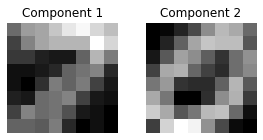


Running EM algorithm for K = 3
Converged at iteration 37 for K = 3
Final Negative Log-Likelihood for K=3: 4357.38 bits
Model cost for K=3: 12416 bits
Total cost for K=3: 16773.38 bits


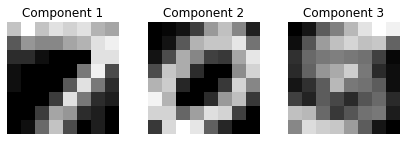


Running EM algorithm for K = 4
Converged at iteration 37 for K = 4
Final Negative Log-Likelihood for K=4: 4143.13 bits
Model cost for K=4: 16576 bits
Total cost for K=4: 20719.13 bits


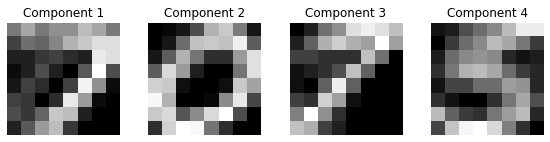


Running EM algorithm for K = 7
Converged at iteration 8 for K = 7
Final Negative Log-Likelihood for K=7: 3534.04 bits
Model cost for K=7: 29056 bits
Total cost for K=7: 32590.04 bits


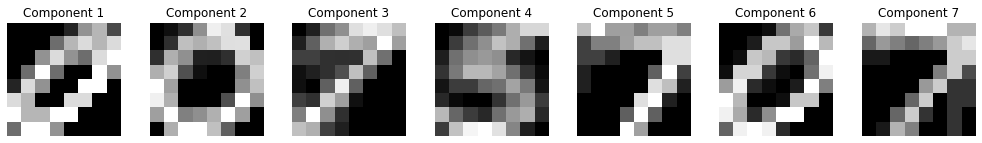


Running EM algorithm for K = 10
Converged at iteration 11 for K = 10
Final Negative Log-Likelihood for K=10: 3297.51 bits
Model cost for K=10: 41536 bits
Total cost for K=10: 44833.51 bits


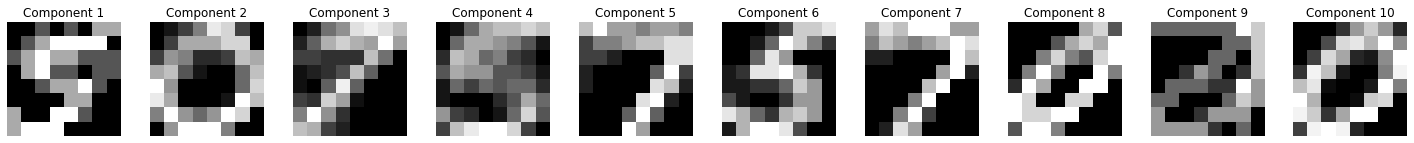

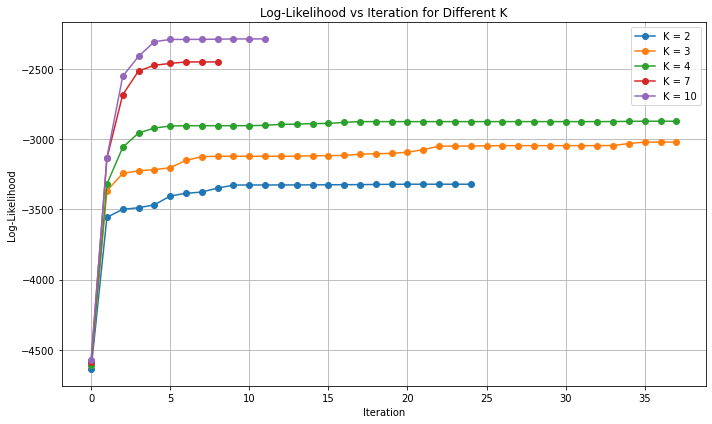

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def em_algorithm(X, K, max_iter=100, tol=1e-6):
    """
    Perform the Expectation-Maximization algorithm for a Bernoulli mixture model.

    Parameters:
        X (np.ndarray): The data matrix of shape (N, D), where N is the number of samples
                        and D is the dimensionality of each sample.
        K (int): The number of mixture components.
        max_iter (int): The maximum number of iterations to run the algorithm.
        tol (float): The tolerance for convergence based on log-likelihood improvement.

    Returns:
        pi_k (np.ndarray): Mixing coefficients of shape (K,).
        P_kd (np.ndarray): Bernoulli parameters of shape (K, D).
        log_likelihoods (list): Log-likelihood values at each iteration.
        final_log_likelihood (float): The final log-likelihood value.
    """
    N, D = X.shape

    # Initialize mixing coefficients uniformly (pi_k)
    pi_k = np.full(K, 1 / K)
    # Initialize Bernoulli parameters randomly between 0.25 and 0.75 (P_kd)
    np.random.seed(0)
    P_kd = np.random.rand(K, D) * 0.5 + 0.25
    log_likelihoods = []

    for iteration in range(max_iter):
        # E-step: Compute responsibilities (gamma_nk)
        log_gamma_nk = np.zeros((N, K))
        for k in range(K):
            # Calculate log probability for each data point under component k
            # Adding a small constant (1e-10) to avoid log(0)
            log_prob = X @ np.log(P_kd[k] + 1e-10) + (1 - X) @ np.log(1 - P_kd[k] + 1e-10)
            log_gamma_nk[:, k] = np.log(pi_k[k] + 1e-10) + log_prob

        # Normalize responsibilities using log-sum-exp for numerical stability
        max_log_gamma = np.max(log_gamma_nk, axis=1, keepdims=True)
        log_gamma_nk -= max_log_gamma  # Subtract max for numerical stability
        gamma_nk = np.exp(log_gamma_nk)
        gamma_nk /= gamma_nk.sum(axis=1, keepdims=True)

        # M-step: Update mixing coefficients (pi_k) and Bernoulli parameters (P_kd)
        N_k = gamma_nk.sum(axis=0)  # Effective number of samples per component
        pi_k = N_k / N
        P_kd = (gamma_nk.T @ X) / N_k[:, np.newaxis]

        # Compute log-likelihood for the current iteration
        log_likelihood = np.sum(
            max_log_gamma.flatten()
            + np.log(np.sum(np.exp(log_gamma_nk), axis=1) + 1e-10)
        )
        log_likelihoods.append(log_likelihood)

        # Check for convergence based on log-likelihood improvement
        if iteration > 0 and np.abs(log_likelihood - log_likelihoods[-2]) < tol:
            print(f"Converged at iteration {iteration} for K = {K}")
            break

    return pi_k, P_kd, log_likelihoods, log_likelihoods[-1]


def plot_mixture_components(P_kd):
    """
    Visualize the Bernoulli parameters of each mixture component as 8x8 grayscale images.

    Parameters:
        P_kd (np.ndarray): Bernoulli parameters of shape (K, D), where K is the number of
                           mixture components and D is the dimensionality of each component.
    """
    K, D = P_kd.shape
    plt.figure(figsize=(2 * K, 2))
    for k in range(K):
        plt.subplot(1, K, k + 1)
        plt.imshow(P_kd[k].reshape(8, 8), cmap='gray', interpolation='nearest')
        plt.axis('off')
        plt.title(f'Component {k + 1}')
    plt.tight_layout()
    plt.show()


def plot_log_likelihoods(log_likelihood_dict):
    """
    Plot the log-likelihood curves for different K values on a single graph.

    Parameters:
        log_likelihood_dict (dict): A dictionary where keys are K values and values are
                                     lists of log-likelihoods per iteration.
    """
    plt.figure(figsize=(10, 6))
    for K, log_likelihoods in log_likelihood_dict.items():
        plt.plot(
            log_likelihoods,
            marker='o',
            label=f'K = {K}'
        )
    plt.title('Log-Likelihood vs Iteration for Different K')
    plt.xlabel('Iteration')
    plt.ylabel('Log-Likelihood')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def compute_gzip_size(filename):
    """
    Compute the size of the compressed data using gzip.

    Parameters:
        filename (str): The name of the file to compress.

    Returns:
        compressed_size (int): The size of the compressed file in bits.
    """
    import gzip
    import os
    with open(filename, 'rb') as f_in, gzip.open('compressed.gz', 'wb') as f_out:
        f_out.writelines(f_in)
    compressed_size = os.path.getsize('compressed.gz') * 8  # Size in bits
    os.remove('compressed.gz')
    raw_size = os.path.getsize('binarydigits.txt') * 8  # Size in bits
    return compressed_size, raw_size


def main():
    """
    Main function to execute the EM algorithm on the binary digits dataset for various K values.
    It plots the log-likelihood progression for all K values on a single plot and
    visualizes the learned mixture components for each K.
    """
    # Load the binary digits data from a text file
    try:
        data = np.loadtxt('binarydigits.txt')
    except IOError:
        print("Error: 'binarydigits.txt' not found. Check working directory.")
        return

    # Define the different values of K (number of mixture components) to evaluate
    K_values = [2, 3, 4, 7, 10]

    # Dictionary to store log-likelihoods for each K
    log_likelihood_dict = {}

    # Compute naive encoding length
    N, D = data.shape
    naive_bits = N * D
    print(f"Naive encoding length: {naive_bits} bits")

    # Compute gzip compressed size
    compressed_bits, raw_bits = compute_gzip_size('binarydigits.txt')
    print(f"file raw size: {raw_bits} bits")
    print(f"gzip compressed size: {compressed_bits} bits")

    bits_per_parameter = 64  #  64 bits per parameter

    # Iterate over each K and perform EM algorithm
    for K in K_values:
        print(f"\nRunning EM algorithm for K = {K}")
        # Execute the EM algorithm
        pi_k, P_kd, log_likelihoods, final_log_likelihood = em_algorithm(data, K)

        # Convert final log-likelihood to bits
        log_likelihood_bits = -final_log_likelihood / np.log(2)  # Negative log-likelihood
        print(f"Final Negative Log-Likelihood for K={K}: {log_likelihood_bits:.2f} bits")

        # Compute model cost
        num_parameters = (K - 1) + K * D  # K-1 mixing proportions + K*D Bernoulli parameters
        model_cost = num_parameters * bits_per_parameter
        print(f"Model cost for K={K}: {model_cost} bits")

        # Total cost
        total_cost = log_likelihood_bits + model_cost
        print(f"Total cost for K={K}: {total_cost:.2f} bits")

        # Store log-likelihoods in the dictionary
        log_likelihood_dict[K] = log_likelihoods

        # Visualize the learned mixture components
        plot_mixture_components(P_kd)

    # After processing all K's, plot all log-likelihoods on a single plot
    plot_log_likelihoods(log_likelihood_dict)


if __name__ == "__main__":
    main()


=== Random Initialization ===
Converged at iteration 37

=== K-Means Initialization ===
Converged at iteration 3

--- Mixture Components for Random Initialization ---


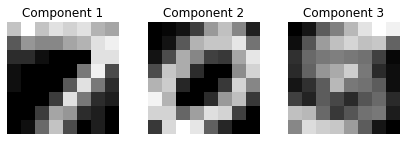


Mixing Coefficients (pi_k) for Random Initialization:
[0.17999995 0.39999957 0.42000048]

Bernoulli Parameters (P_kd) for Random Initialization:
[[7.22222425e-01 9.44444636e-01 7.22222425e-01 8.33333360e-01
  7.77777789e-01 8.33333287e-01 6.66666780e-01 6.11111209e-01
  3.33333353e-01 5.55555504e-01 4.99999933e-01 5.00000067e-01
  6.11111209e-01 6.66666573e-01 8.33333287e-01 8.88889064e-01
  1.66666433e-01 1.66666433e-01 5.55554977e-02 1.64750751e-57
  1.43850353e-53 2.91824845e-40 8.33333287e-01 8.33333360e-01
  5.55555710e-02 1.60421229e-49 2.73701779e-48 2.73701779e-48
  2.91824845e-40 4.44444496e-01 8.88888858e-01 2.77777856e-01
  5.55555710e-02 2.13539835e-54 2.13539744e-54 2.73706869e-48
  3.33333427e-01 8.33333287e-01 4.44444569e-01 1.66666713e-01
  9.26424506e-40 3.40363722e-45 4.87625394e-53 2.22222078e-01
  8.33333287e-01 4.44444495e-01 1.66666713e-01 1.11111142e-01
  9.26421102e-40 1.21824935e-39 2.22222078e-01 6.11111076e-01
  5.55555638e-01 1.66666713e-01 1.11111142e-01 8

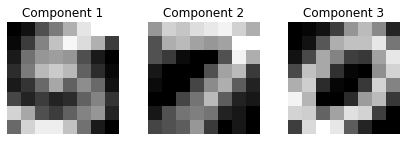


Mixing Coefficients (pi_k) for K-Means Initialization:
[0.33994885 0.25005156 0.40999959]

Bernoulli Parameters (P_kd) for K-Means Initialization:
[[6.17622747e-23 5.88341325e-02 2.64788333e-01 4.11875215e-01
  5.88372882e-01 7.64668556e-01 8.52904112e-01 8.52916103e-01
  2.94557915e-02 2.05942947e-01 4.41292630e-01 6.46979149e-01
  8.23468025e-01 7.35219931e-01 5.88172119e-01 2.05921896e-01
  8.82894274e-02 3.82412763e-01 5.00061773e-01 5.29477915e-01
  5.00061725e-01 2.64595221e-01 8.82583756e-02 8.39483285e-14
  1.47095241e-01 4.11828349e-01 6.17726952e-01 6.76572355e-01
  6.17588260e-01 3.23586668e-01 1.47095248e-01 2.94031634e-02
  8.82632992e-02 1.76485828e-01 3.52994278e-01 5.58755885e-01
  3.23586623e-01 4.70659071e-01 3.52995518e-01 5.88323668e-02
  2.35344237e-01 1.17666476e-01 2.05761607e-01 1.17673294e-01
  1.47081001e-01 3.23578122e-01 4.41257089e-01 1.76485829e-01
  7.06008352e-01 5.58770610e-01 2.64755959e-01 2.05915045e-01
  3.23592863e-01 4.41257089e-01 5.00063429e-01

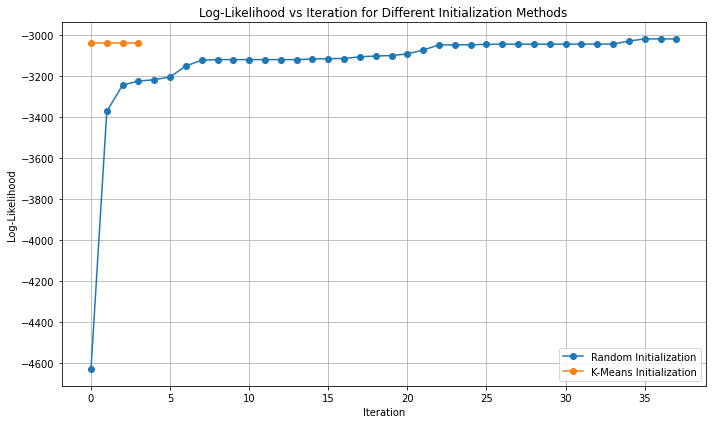

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


def em_algorithm(X, K, init_params=None, max_iter=100, tol=1e-6):
    """
    Perform the Expectation-Maximization (EM) algorithm for a Bernoulli mixture model.
    
    Parameters:
        X (np.ndarray): Data matrix of shape (N, D).
        K (int): Number of mixture components.
        init_params (tuple): Optional tuple (pi_k, P_kd) for initialization.
        max_iter (int): Maximum number of iterations.
        tol (float): Tolerance for convergence.
    
    Returns:
        pi_k (np.ndarray): Mixing coefficients of shape (K,).
        P_kd (np.ndarray): Bernoulli parameters of shape (K, D).
        log_likelihoods (list): Log-likelihood values per iteration.
    """
    N, D = X.shape
    if init_params:
        pi_k, P_kd = init_params
    else:
        # Random Initialization
        pi_k = np.full(K, 1 / K)
        np.random.seed(0)
        P_kd = np.random.rand(K, D) * 0.5 + 0.25
    
    log_likelihoods = []
    
    for iteration in range(max_iter):
        # E-step
        log_gamma_nk = np.zeros((N, K))
        for k in range(K):
            log_prob = X @ np.log(P_kd[k] + 1e-10) + (1 - X) @ np.log(1 - P_kd[k] + 1e-10)
            log_gamma_nk[:, k] = np.log(pi_k[k] + 1e-10) + log_prob
        
        # Log-Sum-Exp for normalization
        max_log_gamma = np.max(log_gamma_nk, axis=1, keepdims=True)
        log_gamma_nk -= max_log_gamma
        gamma_nk = np.exp(log_gamma_nk)
        gamma_nk /= gamma_nk.sum(axis=1, keepdims=True)
        
        # M-step
        N_k = gamma_nk.sum(axis=0)
        pi_k = N_k / N
        P_kd = (gamma_nk.T @ X) / N_k[:, np.newaxis]
        
        # Log-likelihood
        log_likelihood = np.sum(max_log_gamma.flatten() + np.log(gamma_nk.sum(axis=1) + 1e-10))
        log_likelihoods.append(log_likelihood)
        
        # Convergence Check
        if iteration > 0 and np.abs(log_likelihood - log_likelihoods[-2]) < tol:
            print(f"Converged at iteration {iteration}")
            break
    
    return pi_k, P_kd, log_likelihoods


def initialize_with_kmeans(X, K):
    """
    Initialize EM parameters using K-Means clustering.
    
    Parameters:
        X (np.ndarray): Data matrix of shape (N, D).
        K (int): Number of clusters.
    
    Returns:
        pi_k (np.ndarray): Mixing coefficients.
        P_kd (np.ndarray): Bernoulli parameters.
    """
    kmeans = KMeans(n_clusters=K, random_state=0, n_init=10)
    cluster_assignments = kmeans.fit_predict(X)
    
    pi_k = np.array([np.mean(cluster_assignments == k) for k in range(K)])
    P_kd = np.array([
        X[cluster_assignments == k].mean(axis=0) if np.any(cluster_assignments == k) else np.full(X.shape[1], 0.5)
        for k in range(K)
    ])
    
    return pi_k, P_kd


def plot_mixture_components(P_kd, K):
    """
    Visualize the Bernoulli parameters as 8x8 grayscale images.
    
    Parameters:
        P_kd (np.ndarray): Bernoulli parameters of shape (K, D).
        K (int): Number of mixture components.
    """
    plt.figure(figsize=(2 * K, 2))
    for k in range(K):
        plt.subplot(1, K, k + 1)
        plt.imshow(P_kd[k].reshape(8, 8), cmap='gray', interpolation='nearest')
        plt.axis('off')
        plt.title(f'Component {k + 1}')
    plt.tight_layout()
    plt.show()


def plot_log_likelihoods(log_likelihood_dict):
    """
    Plot log-likelihood curves for different initialization methods.
    
    Parameters:
        log_likelihood_dict (dict): Keys are method names, values are log-likelihood lists.
    """
    plt.figure(figsize=(10, 6))
    for method, log_likelihoods in log_likelihood_dict.items():
        plt.plot(log_likelihoods, marker='o', label=method)
    plt.title('Log-Likelihood vs Iteration for Different Initialization Methods')
    plt.xlabel('Iteration')
    plt.ylabel('Log-Likelihood')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def main():
    """
    Execute the EM algorithm with different initialization methods and compare their performance.
    """
    # Load the binary digits data
    try:
        data = np.loadtxt('binarydigits.txt')
    except IOError:
        print("Error: 'binarydigits.txt' not found. Check working directory.")
        return
    
    K = 3  # Example number of clusters
    methods = ['Random Initialization', 'K-Means Initialization']
    log_likelihood_dict = {}
    initialized_params = {}
    
    # Random Initialization
    print("\n=== Random Initialization ===")
    pi_random, P_random, log_likelihood_random = em_algorithm(data, K)
    log_likelihood_dict['Random Initialization'] = log_likelihood_random
    initialized_params['Random Initialization'] = (pi_random, P_random)
    
    # K-Means Initialization
    print("\n=== K-Means Initialization ===")
    pi_kmeans, P_kmeans = initialize_with_kmeans(data, K)
    pi_kmeans, P_kmeans, log_likelihood_kmeans = em_algorithm(data, K, init_params=(pi_kmeans, P_kmeans))
    log_likelihood_dict['K-Means Initialization'] = log_likelihood_kmeans
    initialized_params['K-Means Initialization'] = (pi_kmeans, P_kmeans)
    
    # Visualization of Mixture Components
    for method in methods:
        print(f"\n--- Mixture Components for {method} ---")
        pi, P_kd = initialized_params[method]
        plot_mixture_components(P_kd, K)
        print(f"\nMixing Coefficients (pi_k) for {method}:")
        print(pi)
        print(f"\nBernoulli Parameters (P_kd) for {method}:")
        print(P_kd)
        print(f"\nLog-Likelihoods at each iteration for {method}:")
        print(log_likelihood_dict[method])
    
    # Plot Log-Likelihoods Comparison
    plot_log_likelihoods(log_likelihood_dict)


if __name__ == "__main__":
    main()
